In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import mysql.connector

# Connect to server
cnx = mysql.connector.connect(
    host="127.0.0.1",
    port=3306,
    user="root",
    password="sqlpass")

In [3]:
import pandas as pd

In [9]:
query = "select * from banking_risk_analysis.customer"

In [10]:
df = pd.read_sql(query, cnx)

C:\Users\devmode\AppData\Local\Temp\ipykernel_11384\1600954950.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


In [11]:
print(df)

     ï»¿Client ID              Name  Age  Location ID Joined Bank  \
0        IND81288     Raymond Mills   24        34324  06-05-2019   
1        IND65833     Julia Spencer   23        42205  10-12-2001   
2        IND47499    Stephen Murray   27         7314  25-01-2010   
3        IND72498    Virginia Garza   40        34594  28-03-2019   
4        IND60181   Melissa Sanders   46        41269  20-07-2012   
...           ...               ...  ...          ...         ...   
2995     IND66827         Earl Hall   82         8760  09-10-2014   
2996     IND40556  Billy Williamson   44        32837  05-02-2009   
2997     IND72414      Victor Black   70        36088  29-12-2009   
2998     IND46652       Andrew Ford   56        24871  13-02-2006   
2999     IND40216        Amy Nguyen   79        38518  08-12-2005   

          Banking Contact Nationality                     Occupation  \
0          Anthony Torres    American           Safety Technician IV   
1        Jonathan Hawkins  

In [12]:
df.head(5)

,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [ ]:
#Starting the analysis

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
df = pd.read_csv('Datasets/Banking.csv')
df.head(5)

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [20]:
df.shape

(3000, 25)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [22]:
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Mid', 'High']

df['Income Band'] = pd.cut(df['Estimated Income'], bins = bins, labels = labels, right = False)


In [23]:
df['Income Band'].value_counts()

Income Band
Mid     1517
Low     1027
High     456
Name: count, dtype: int64

<Axes: xlabel='Income Band'>

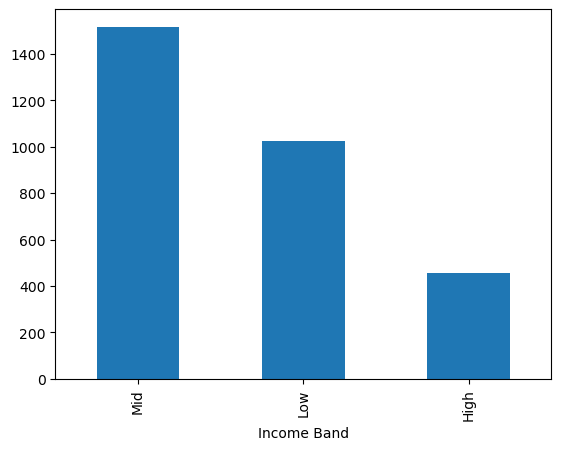

In [26]:
df['Income Band'].value_counts().plot(kind='bar')

In [31]:
categorical_cols = df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure","Properties Owned", "Loyalty Classification", "Risk Weighting"]].columns
for col in categorical_cols:
    print(f"Value counts for '{col}':")
    display(df[col].value_counts())

Value counts for 'BRId':


BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

Value counts for 'GenderId':


GenderId
2    1512
1    1488
Name: count, dtype: int64

Value counts for 'IAId':


IAId
1     177
2     177
3     177
4     177
8     177
9     176
13    176
12    176
10    176
11    176
14    176
15    176
6      89
5      89
7      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

Value counts for 'Amount of Credit Cards':


Amount of Credit Cards
1    1922
2     765
3     313
Name: count, dtype: int64

Value counts for 'Nationality':


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

Value counts for 'Occupation':


Occupation
Associate Professor             28
Structural Analysis Engineer    28
Recruiter                       25
Account Coordinator             24
Human Resources Manager         24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

Value counts for 'Fee Structure':


Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

Value counts for 'Properties Owned':


Properties Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

Value counts for 'Loyalty Classification':


Loyalty Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

Value counts for 'Risk Weighting':


Risk Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64

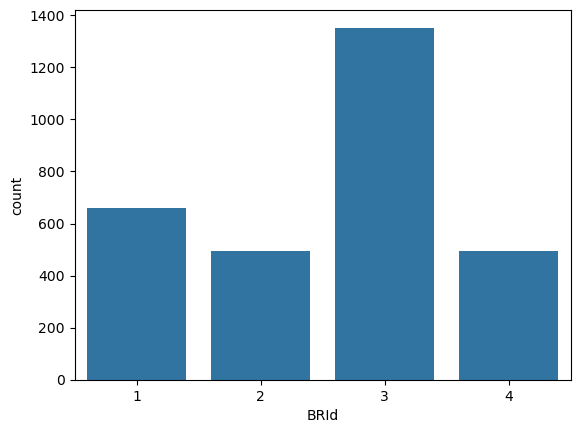

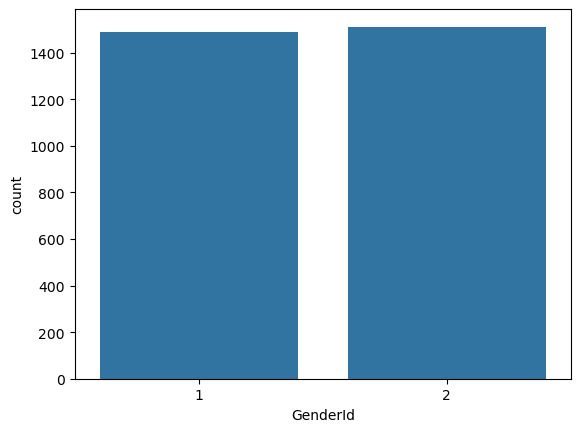

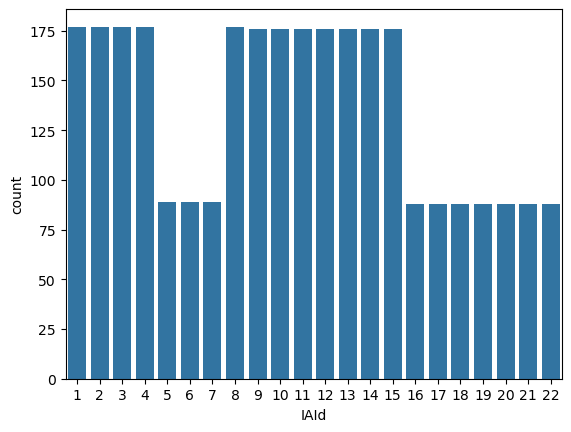

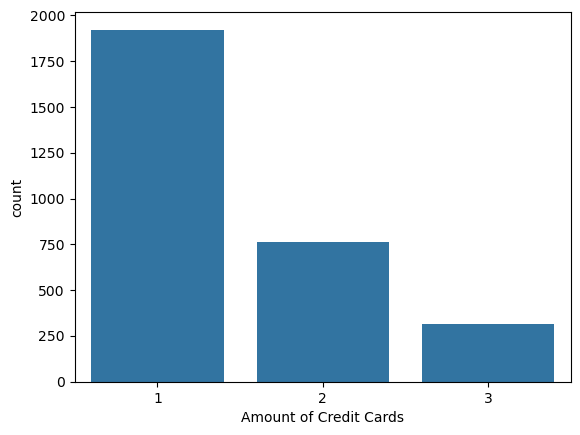

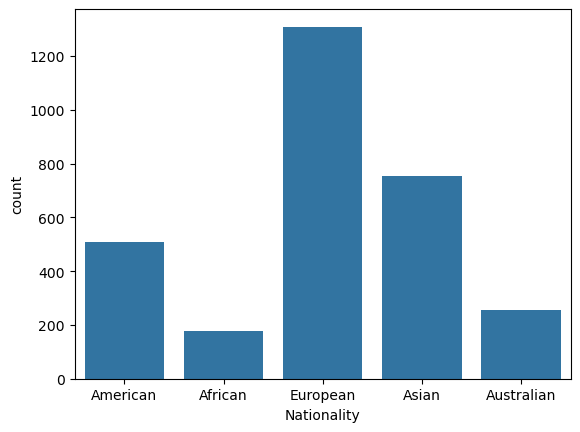

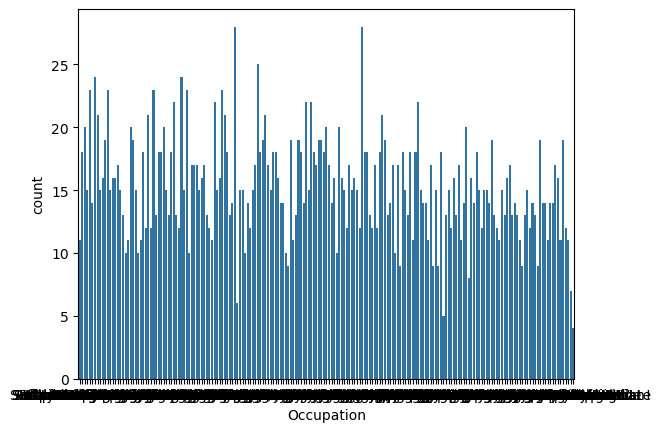

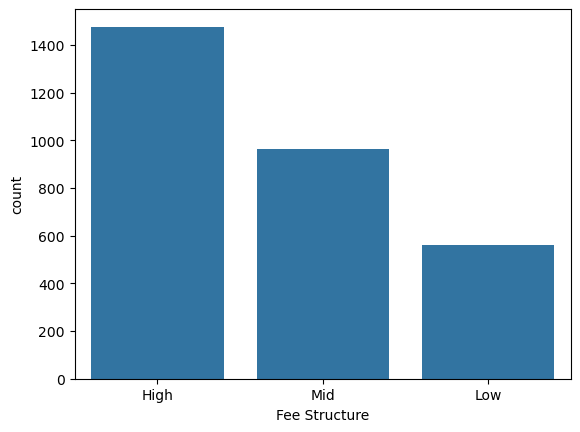

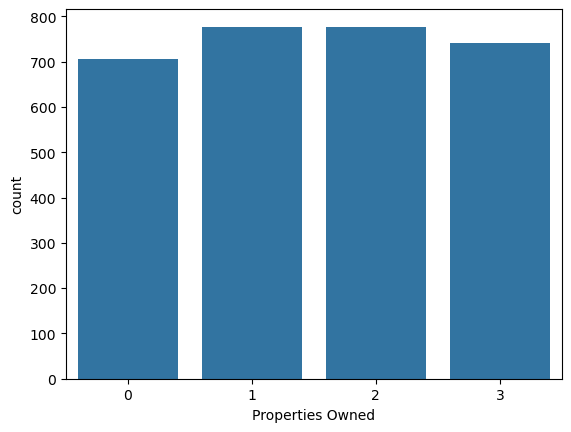

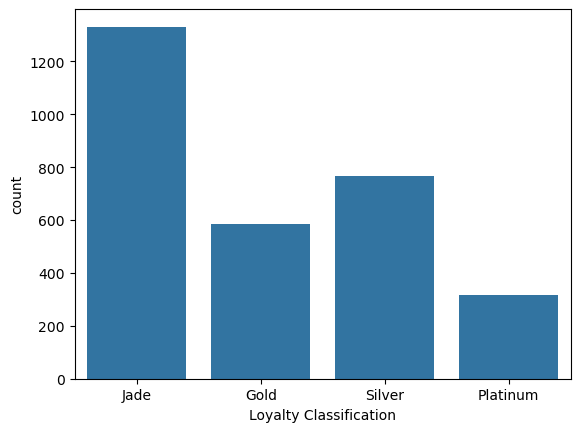

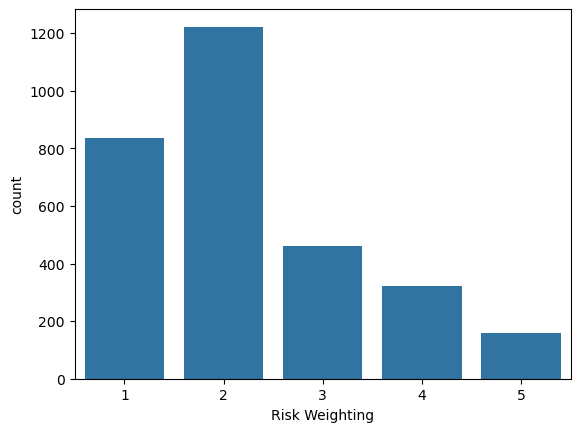

In [36]:
#Univariate Analysis
for i, predictor in enumerate(df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure","Properties Owned", "Loyalty Classification", "Risk Weighting"]]):
    plt.figure(i)
    sns.countplot(data = df, x = predictor)

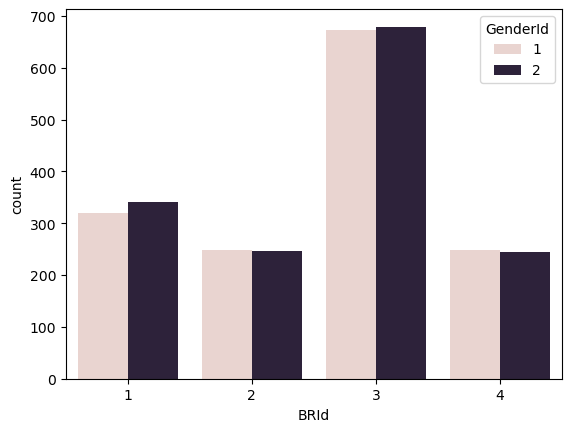

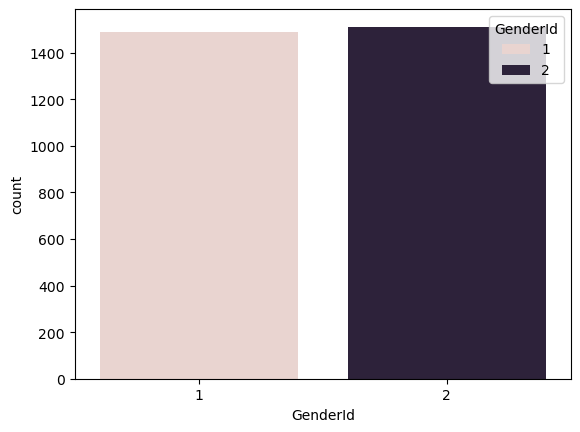

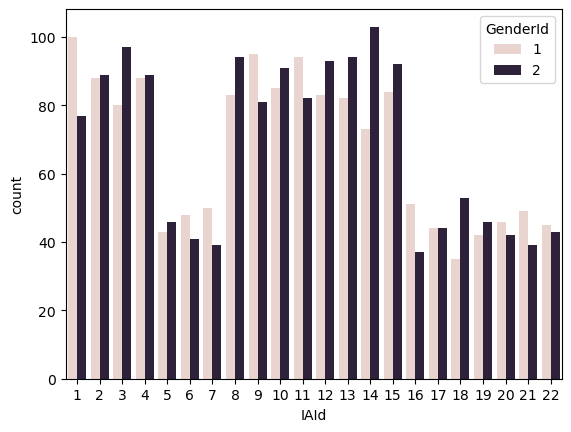

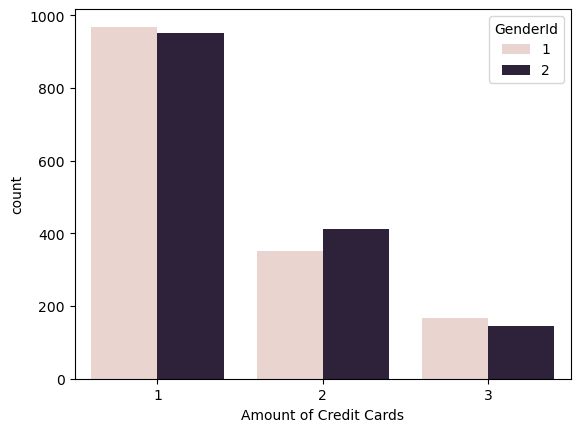

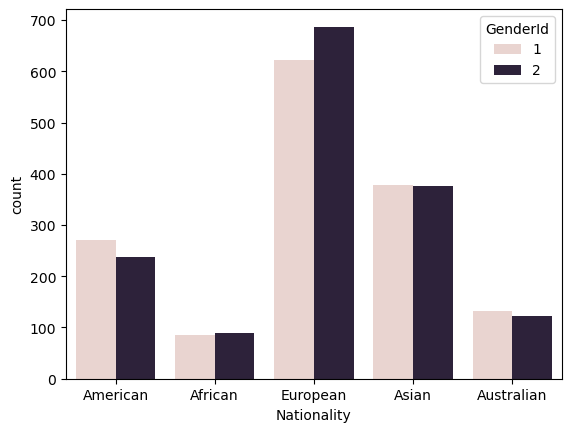

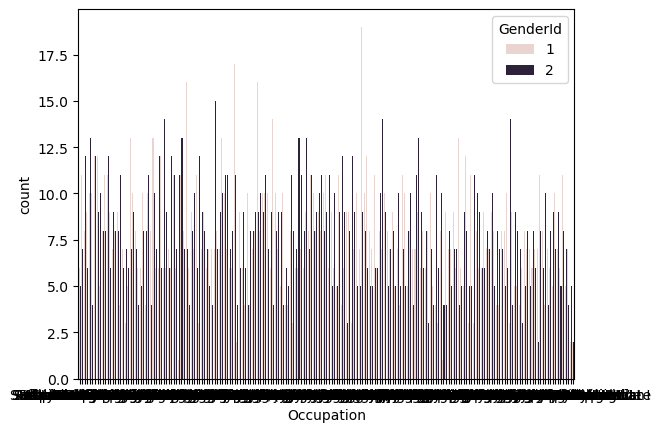

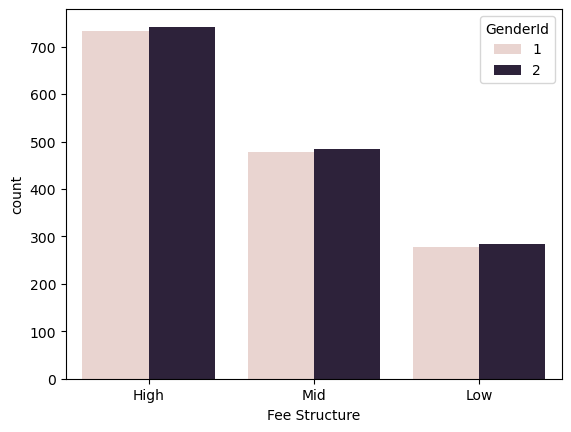

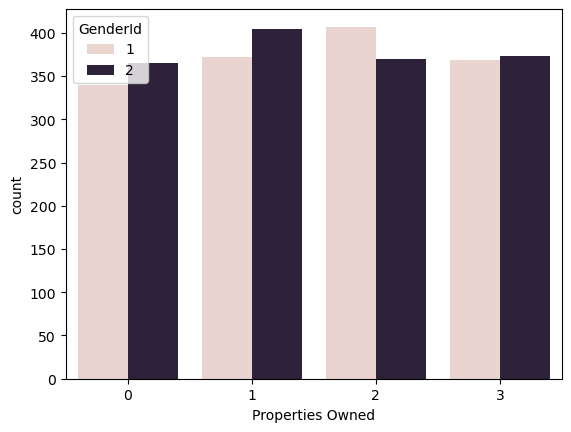

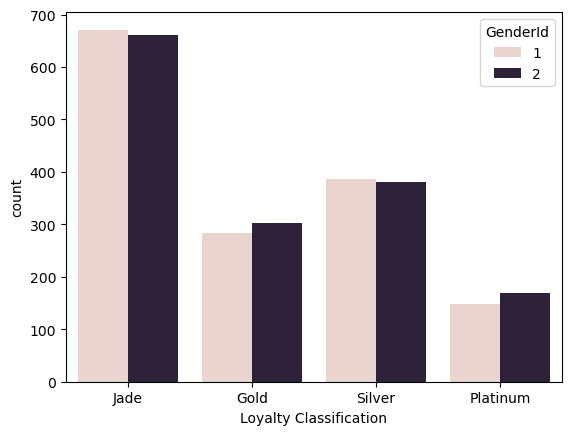

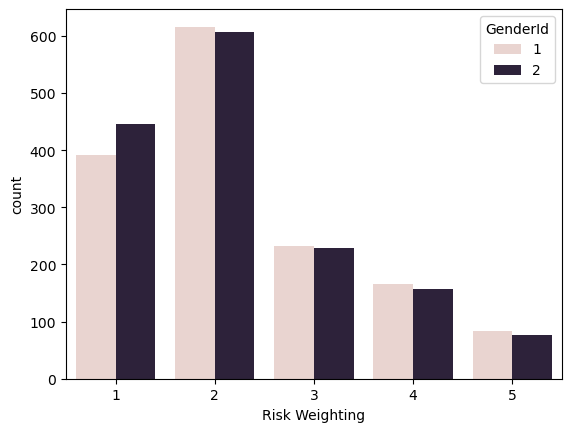

In [37]:
#Bivariate Analysis
for i, predictor in enumerate(df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure","Properties Owned", "Loyalty Classification", "Risk Weighting"]]):
    plt.figure(i)
    sns.countplot(data = df, x = predictor, hue='GenderId')

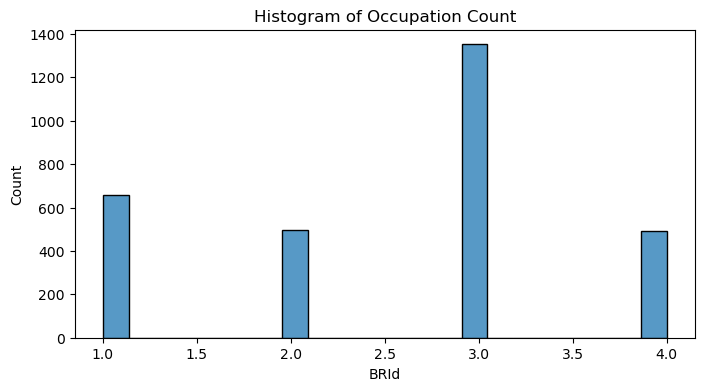

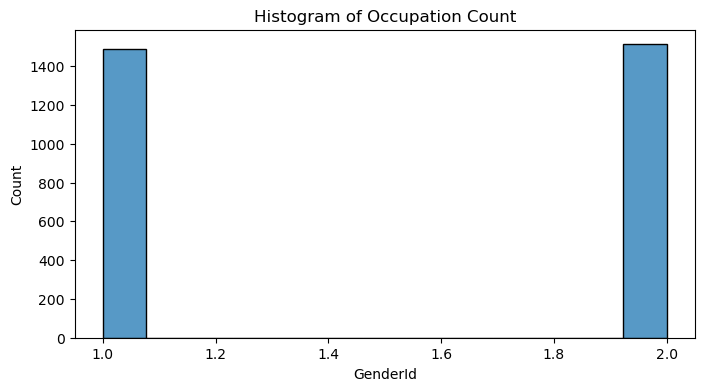

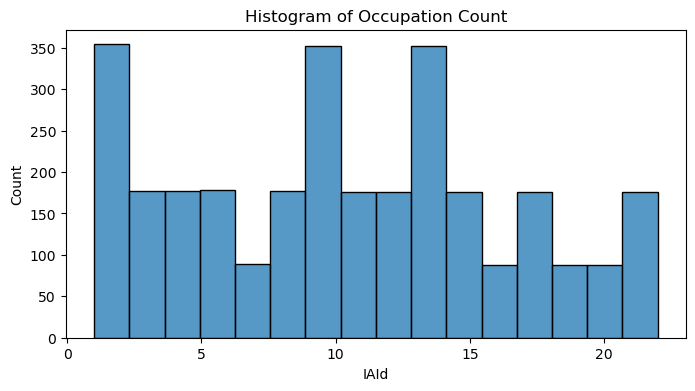

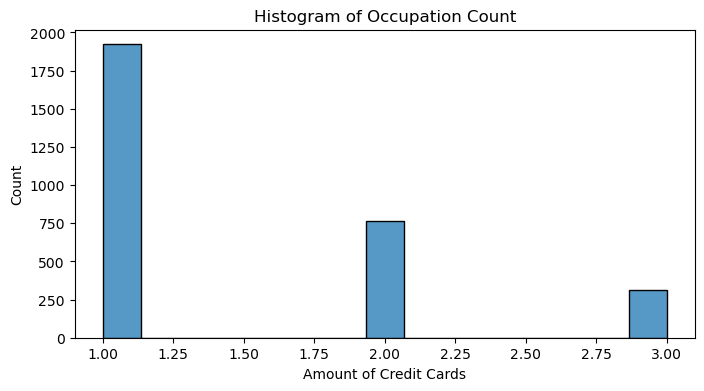

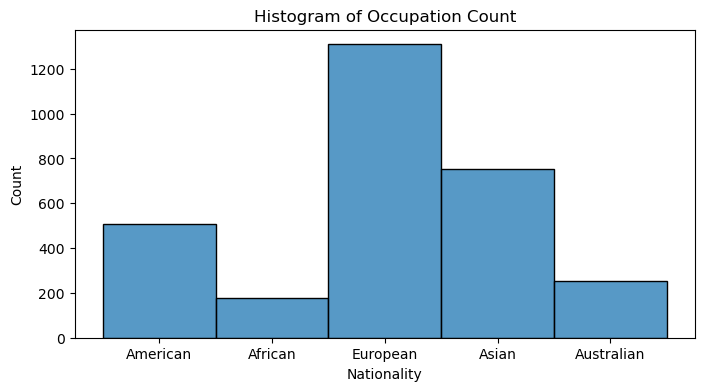

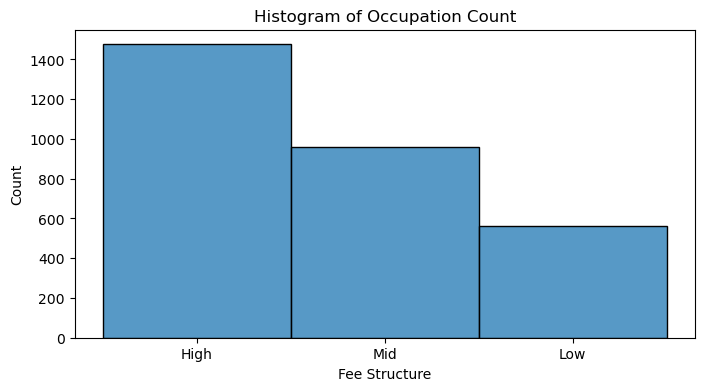

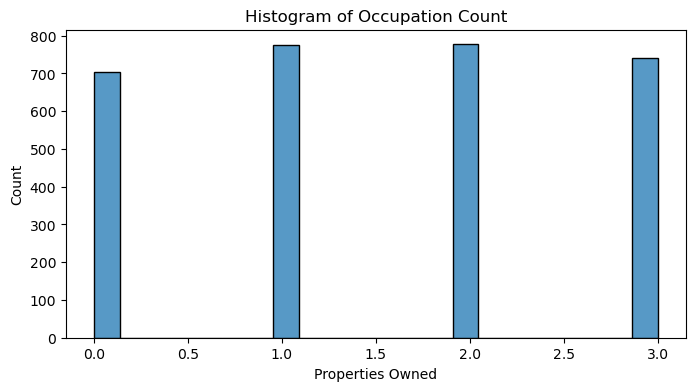

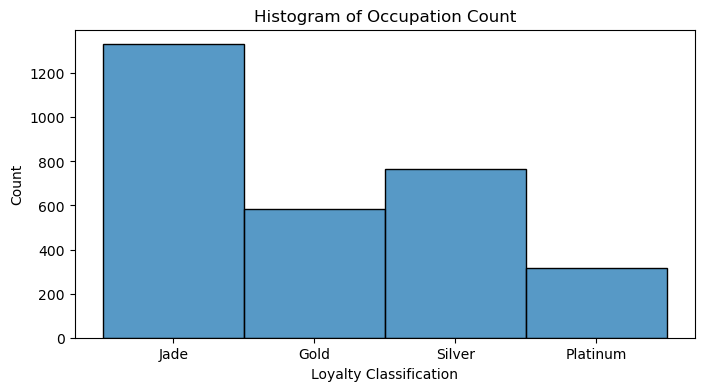

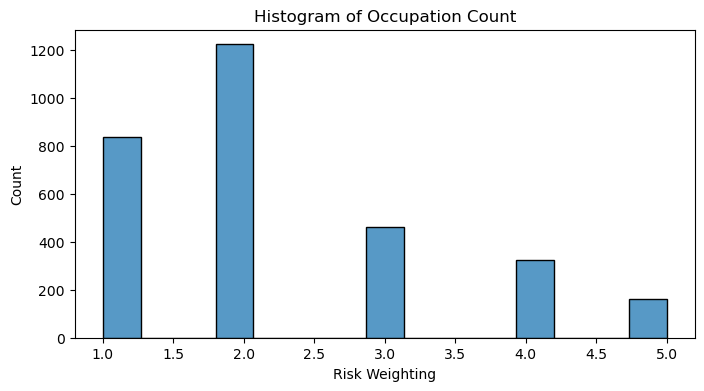

In [39]:
for col in categorical_cols:
    if col == "Occupation":
        continue
    plt.figure(figsize=(8,4))
    sns.histplot(df[col])
    plt.title('Histogram of Occupation Count')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

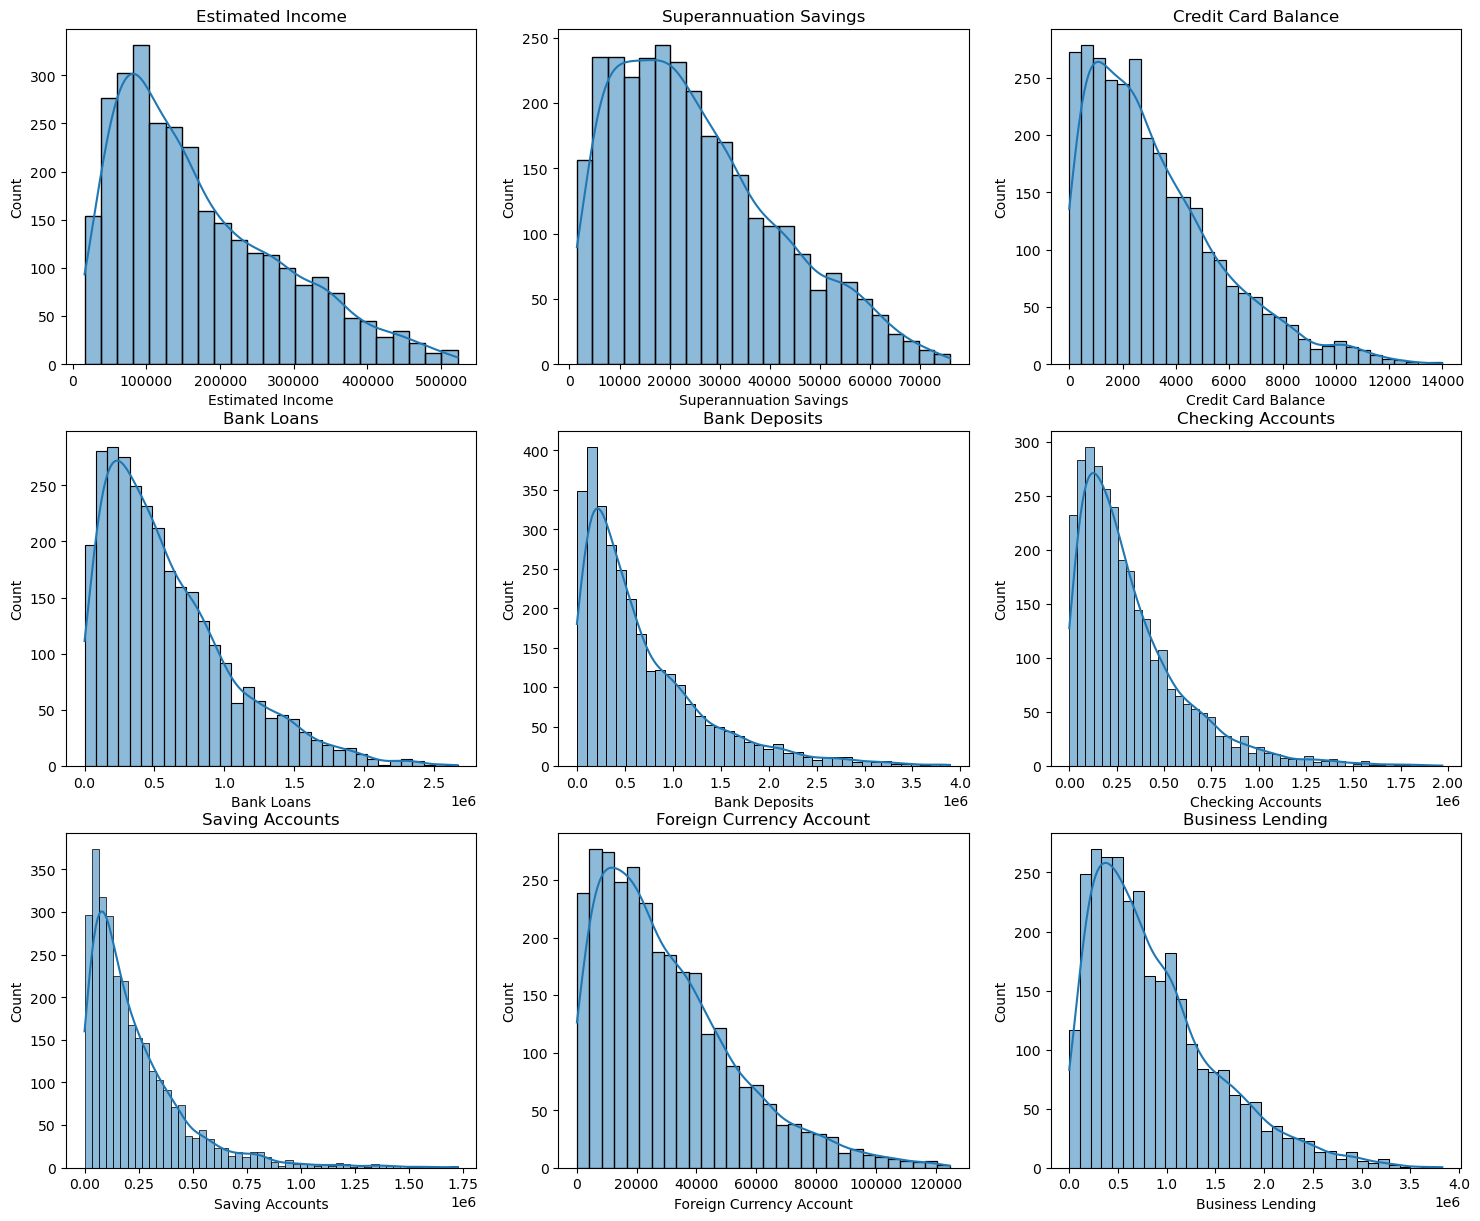

In [51]:
#Univariate analysis and visualization
numerical_cols = ['Estimated Income', 'Superannuation Savings','Credit Card Balance','Bank Loans','Bank Deposits','Checking Accounts','Saving Accounts','Foreign Currency Account','Business Lending']
plt.figure(figsize=(18,20))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col],kde=True)
    plt.title(col)
plt.show()

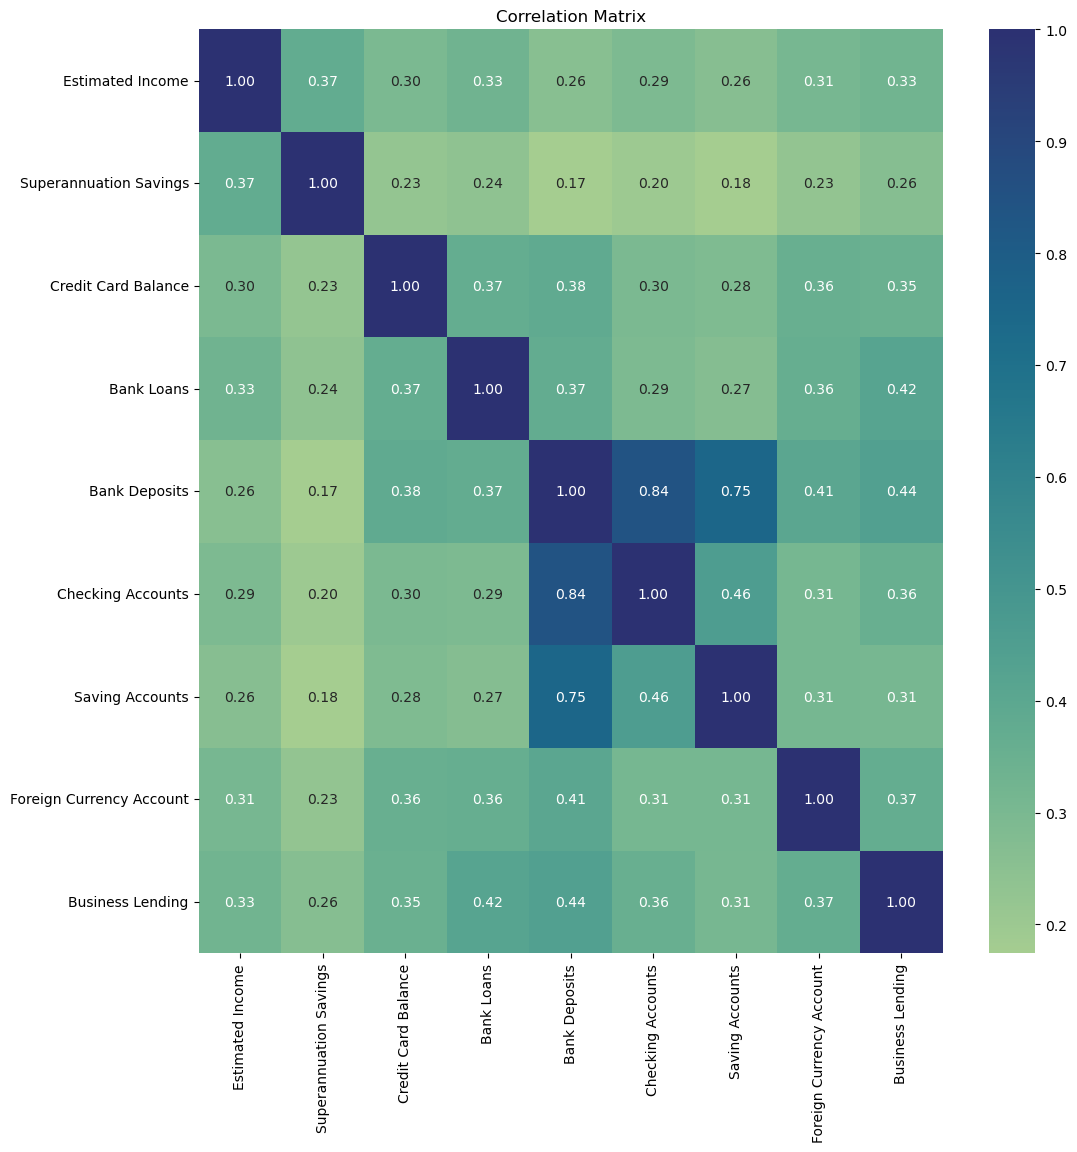

In [55]:
#Heatmaps
numerical_cols = ['Estimated Income', 'Superannuation Savings','Credit Card Balance','Bank Loans','Bank Deposits','Checking Accounts','Saving Accounts','Foreign Currency Account','Business Lending']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
"""
Inisghts of EDA:
The strongest positive correlation occur among "Bank Deposits", "Saving Accounts" and "Foreign Currency Account", indicating that
customers who maintain high balances in one account type often hold substantial amount/funds across other accounts as well.
"""